In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('StudentsPerformance.csv')

In [5]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


It appears that the race/ethnicity column has letters (A, B, C, etc) instead of actual races and ethnicities. This makes it difficult to draw conclusions about this specific column. 

In [25]:
df.rename(columns = {'parental level of education':'parental_education', 'test preparation course': 'test_prep', 'math score': 'math_score', 'reading score': 'reading_score', 'writing score': 'writing_score'}, inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   gender              1000 non-null   object
 1   race/ethnicity      1000 non-null   object
 2   parental_education  1000 non-null   object
 3   lunch               1000 non-null   object
 4   test_prep           1000 non-null   object
 5   math_score          1000 non-null   int64 
 6   reading_score       1000 non-null   int64 
 7   writing_score       1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


'df.info()' lets us know that there are 1000 entries. In each column there are 1000 non-null entries. This is good because it means we have no missing information. Another good thing to note is that there are only three numerical columns: 'math_score', 'reading_score', and 'writing_score'. 

In [27]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


All means are less than 70%.
The math mean is the lowest! Reading score mean is the highest!



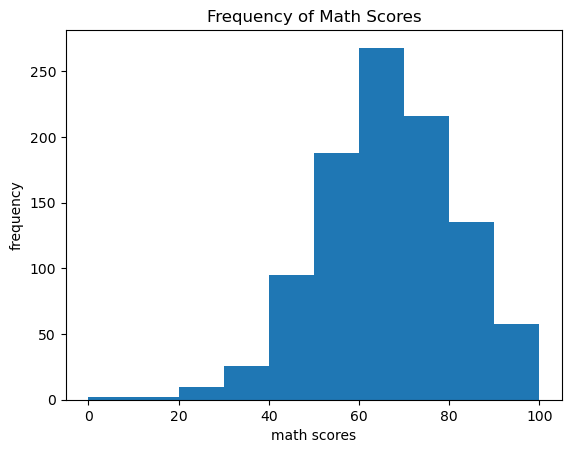

In [28]:
plt.hist(df['math_score'])
plt.xlabel('math scores')
plt.ylabel('frequency')
plt.title('Frequency of Math Scores')
plt.show()

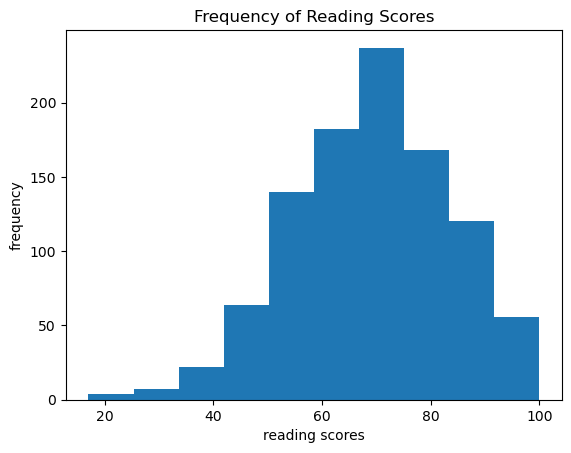

In [29]:
plt.hist(df['reading_score'])
plt.xlabel('reading scores')
plt.ylabel('frequency')
plt.title('Frequency of Reading Scores')
plt.show()

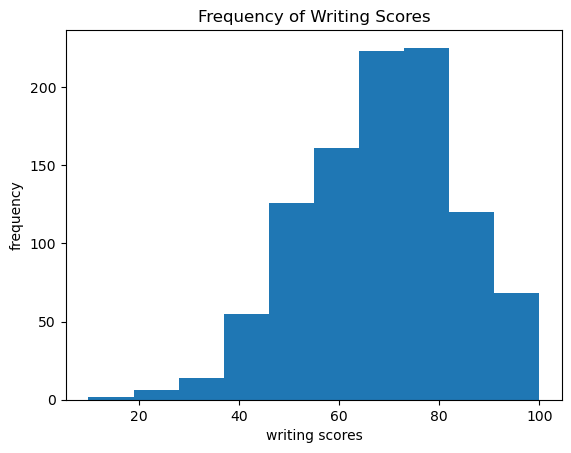

In [30]:
plt.hist(df['writing_score'])
plt.xlabel('writing scores')
plt.ylabel('frequency')
plt.title('Frequency of Writing Scores')
plt.show()

The histograms for math, reading, and writing scores are all slightly left skewed. This indicates that the scores are mostly higher. 

In [32]:
# For this study, I am using a +/- gpa system. 
# 93+ = 4.0
# 90 - 92 = 3.67
# 87 - 89 = 3.33
# 83 - 86 = 3.0
# 80 - 82 = 2.67
# 77 - 79 = 2.33
# 73 - 76 = 2.0
# 70 - 72 = 1.67
# 67 - 69 = 1.33
# 65 - 66 = 1.0
# 0 - 64 = 0.0
def gp_converter(score):
    if score < 65: # F
        return 0
    elif score == 65 or score == 66: # D
        return 1.0
    elif 67 <= score <= 69: # D+
        return 1.33
    elif 70 <= score <= 72: # C-
        return 1.67 
    elif 73 <= score <= 76: # C
        return 2.0
    elif 77 <= score <= 79: # C+
        return 2.33
    elif 80 <= score <= 82: # B-
        return 2.67
    elif 83 <= score <= 86: # B
        return 3.0
    elif 87 <= score <= 89: # B+
        return 3.33
    elif 90 <= score <= 92: # A-
        return 3.67
    elif 93 <= score: # A
        return 4.0



In [39]:
gpa_list = []
for math, reading, writing in zip(df['math_score'], df['reading_score'], df['writing_score']):
    gpa = round((gp_converter(math) + gp_converter(reading)+ gp_converter(writing)) / 3,2)
    gpa_list.append(gpa)

df['GPA'] = gpa_list

In [40]:
df

,gender,race/ethnicity,parental_education,lunch,test_prep,math_score,reading_score,writing_score,GPA
0,female,group B,bachelor's degree,standard,none,72,72,74,1.78
1,female,group C,some college,standard,completed,69,90,88,2.78
2,female,group B,master's degree,standard,none,90,95,93,3.89
3,male,group A,associate's degree,free/reduced,none,47,57,44,0.00
4,male,group C,some college,standard,none,76,78,75,2.11
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,3.78
996,male,group C,high school,free/reduced,none,62,55,55,0.00
997,female,group C,high school,free/reduced,completed,59,71,65,0.89
998,female,group D,some college,standard,completed,68,78,77,2.00


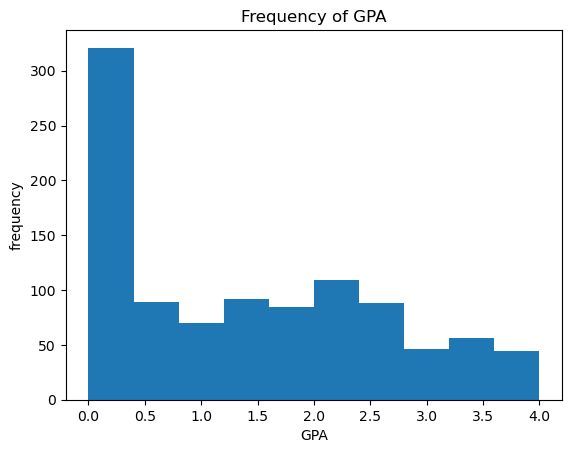

In [41]:
plt.hist(df['GPA'])
plt.xlabel('GPA')
plt.ylabel('frequency')
plt.title('Frequency of GPA')
plt.show()

In [52]:
counts_gpa = df['GPA'].value_counts().sort_values(ascending=False)
counts_gpa.head(5)

GPA
0.00    285
0.44     37
0.33     36
1.78     31
2.11     30
Name: count, dtype: int64

The GPA with the most counts is 0.00.

In [56]:
print(df['parental_education'].unique())

["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [57]:
print(df['lunch'].unique())

['standard' 'free/reduced']


In [64]:
avg_bachelors_gpa = round(np.mean(df[df['parental_education']=="bachelor's degree"].GPA),2)
avg_some_college_gpa = round(np.mean(df[df['parental_education']=='some college'].GPA),2)
avg_masters_gpa = round(np.mean(df[df["parental_education"]=="master's degree"].GPA),2)
avg_associates_gpa = round(np.mean(df[df["parental_education"]=="associate's degree"].GPA),2)
avg_high_school_gpa = round(np.mean(df[df['parental_education']=='high school'].GPA),2)
avg_some_high_school_gpa = round(np.mean(df[df['parental_education']=='some high school'].GPA),2)

In [73]:
bachelors_subset = df[df['parental_education']=="bachelor's degree"]
some_college_gpa_subset = df[df['parental_education']=='some college']
masters_gpa_subset = df[df["parental_education"]=="master's degree"]
associates_gpa = df[df["parental_education"]=="associate's degree"]
high_school_gpa_subset = df[df['parental_education']=='high school']
some_high_school_gp_subset = df[df['parental_education']=='some high school']

Text(0.5, 1.0, "Lunch Types for Bachelor's Degrees")

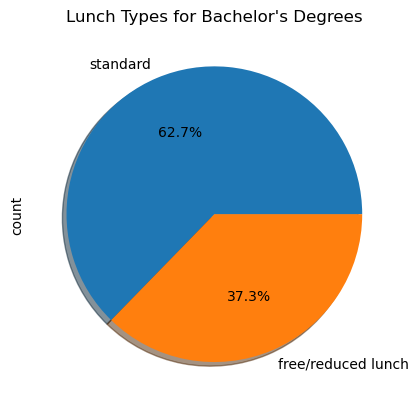

In [79]:
counts = bachelors_subset['lunch'].value_counts()
counts.plot.pie(autopct='%1.1f%%', labels=['standard', 'free/reduced lunch'], shadow=True)
plt.title("Lunch Types for Bachelor's Degrees")

In [ ]:
counts_sc = some_college_gpa_subset['lunch'].value_counts()
counts.plot.pie(autopct='%1.1f%%', labels=['standard', 'free/reduced lunch'], shadow=True)
plt.title("Lunch Types for Some College")